# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [15]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Solution

## Data Cleaning and Sanitization

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df_flights.shape

(271940, 20)

In [18]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


Potential issues observed in the following columns and possible remedies:
1. DepDel15 - binary column with missing values in 2761 rows. They can be computed using DepDelay column. 
2. DepDelay - Many outliers in both bounds. Suggested to be removed.
3. ArrDelay - Many outliers in both bounds. Suggested to be removed.

<ipython-input-26-2cea7e040ee8>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


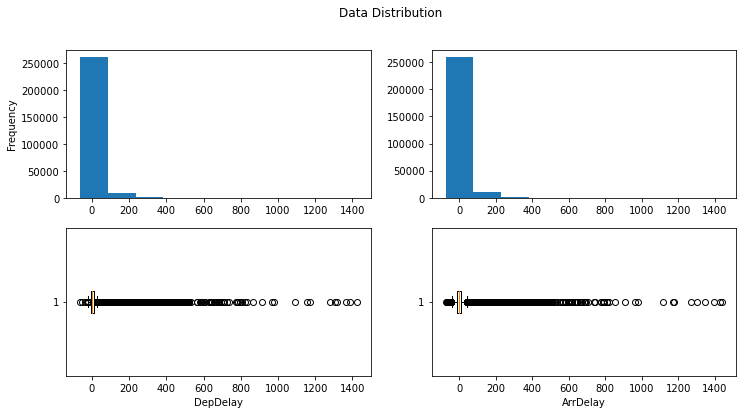

In [26]:
fig, ax = plt.subplots(2, 2, figsize = (12,6))

ax[0][0].hist(df_flights['DepDelay'])
ax[0][0].set_ylabel('Frequency')

# Plot the boxplot   
ax[1][0].boxplot(df_flights['DepDelay'], vert=False)
ax[1][0].set_xlabel('DepDelay')


ax[0][1].hist(df_flights['ArrDelay'])
#ax[2].set_ylabel('Frequency')

# Plot the boxplot   
ax[1][1].boxplot(df_flights['ArrDelay'], vert=False)
ax[1][1].set_xlabel('ArrDelay')

# Add a title to the Figure
fig.suptitle('Data Distribution')

# Show the figure
fig.show()

In [27]:
df_flights[df_flights.DepDel15.isna()]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [61]:
df_flights.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [34]:
df_flights[df_flights.DepDel15.isna()].Cancelled.value_counts()

1    2761
Name: Cancelled, dtype: int64

In [75]:
df_flights[df_flights.DepDel15.isna()].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [38]:
df_flights[df_flights.Cancelled ==1].DepDel15.value_counts()

1.0    82
0.0    73
Name: DepDel15, dtype: int64

In [40]:
df_flights[df_flights.Cancelled ==1].shape

(2916, 20)

DepDel15
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DepDelay, dtype: object

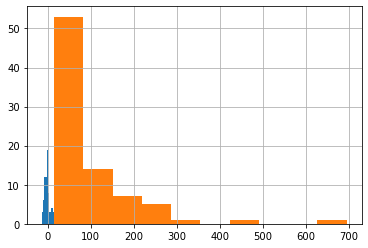

In [58]:
df_flights[df_flights.Cancelled ==1].groupby('DepDel15')['DepDelay'].hist()

Since all NA values in DepDel15 are for cancelled flights and since there are very few cancelled flights with most having DepDel15 as NaN and few spread across both 0 and 1, how we handle this depends on context of what is our purpose with data. 
1. If cancelled is our dependent variable, we cannot use DepDel15 and cannot drop these rows.
2. If some other column is our dependent variable or we make other hypothesis that will not be biased if we delete these rows, we delete these rows.

Since our analysis revolves around studying DepDelay and ArrDelay, we have to set these rows to 0 as our DepDelay is 0 and deleting them may include bias.

In [79]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)


In [80]:
print(df_flights.shape)
print(df_flights.isna().sum())

(271940, 20)
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64


In [82]:
df_flights[df_flights.DepDelay>df_flights.DepDelay.quantile(0.99)].shape

(2698, 20)

In [83]:
df_flights[df_flights.ArrDelay>df_flights.ArrDelay.quantile(0.99)].shape

(2680, 20)

In [84]:
df_flights[(df_flights.DepDelay>df_flights.DepDelay.quantile(0.99)) | (df_flights.ArrDelay>df_flights.ArrDelay.quantile(0.99))]  .shape

(3019, 20)

array([[<AxesSubplot:title={'center':'DepDelay'}>]], dtype=object)

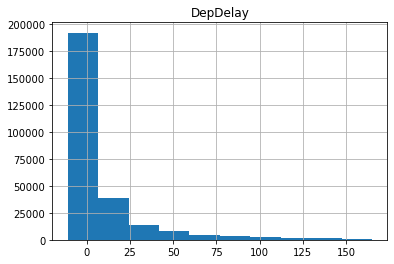

In [88]:
df_flights[(df_flights.DepDelay>df_flights.DepDelay.quantile(0.01)) & (df_flights.DepDelay<df_flights.DepDelay.quantile(0.99))][['DepDelay']].hist()

array([[<AxesSubplot:title={'center':'ArrDelay'}>]], dtype=object)

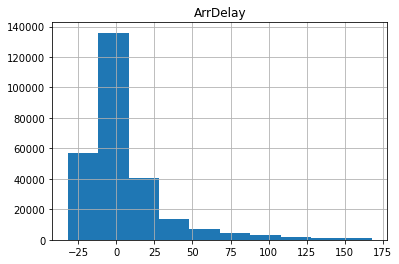

In [89]:
df_flights[(df_flights.ArrDelay>df_flights.ArrDelay.quantile(0.01)) & (df_flights.ArrDelay<df_flights.ArrDelay.quantile(0.99))][['ArrDelay']].hist()

In [91]:
# Removing outliers
DepDelay_01per = df_flights.DepDelay.quantile(0.01)
DepDelay_99per = df_flights.DepDelay.quantile(0.99)


ArrDelay_01per = df_flights.ArrDelay.quantile(0.01)
ArrDelay_99per = df_flights.ArrDelay.quantile(0.99)


df_flights = df_flights[(df_flights.DepDelay > DepDelay_01per) & (df_flights.DepDelay < DepDelay_99per)]
df_flights = df_flights[(df_flights.ArrDelay > ArrDelay_01per) & (df_flights.ArrDelay < ArrDelay_99per)]

df_flights.shape


(263360, 20)

<ipython-input-92-2cea7e040ee8>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


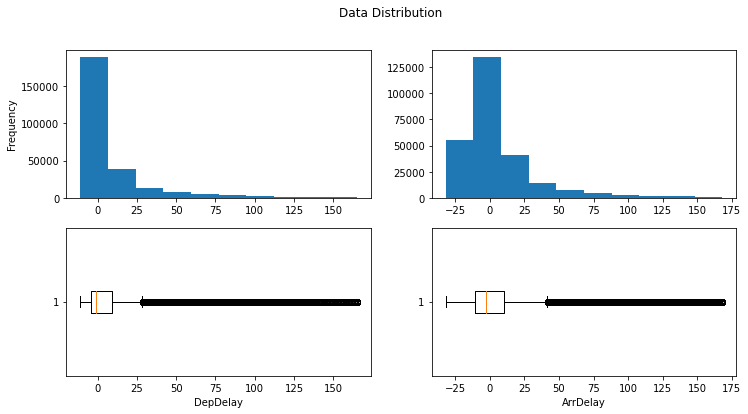

In [92]:
fig, ax = plt.subplots(2, 2, figsize = (12,6))

ax[0][0].hist(df_flights['DepDelay'])
ax[0][0].set_ylabel('Frequency')

# Plot the boxplot   
ax[1][0].boxplot(df_flights['DepDelay'], vert=False)
ax[1][0].set_xlabel('DepDelay')


ax[0][1].hist(df_flights['ArrDelay'])
#ax[2].set_ylabel('Frequency')

# Plot the boxplot   
ax[1][1].boxplot(df_flights['ArrDelay'], vert=False)
ax[1][1].set_xlabel('ArrDelay')

# Add a title to the Figure
fig.suptitle('Data Distribution')

# Show the figure
fig.show()

## Now, using the data to answer the following questions:
1. What are the average (mean) departure and arrival delays?
2. How do the carriers compare in terms of arrival delay performance?
3. Is there a noticable difference in arrival delays for different days of the week?
4. Which departure airport has the highest average departure delay?
5. Do late departures tend to result in longer arrival delays than on-time departures?
6. Which route (from origin airport to destination airport) has the most late arrivals?
7. Which route has the highest average arrival delay?

## Mean dep and arrival delays

As shown below, mean dep delay is 8.19 mins and mean arr delay is 4.54 mins.

In [94]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,263360.0,263360.000000,263360.000000,263360.000000,263360.000000,263360.000000,263360.000000,263360.000000,263360.000000,263360.00000,263360.000000,263360.000000,263360.000000
mean,2013.0,6.980232,15.817163,3.898413,12743.420333,12735.546252,1323.240663,8.192599,0.193902,1502.86294,4.541149,0.211114,0.011019
std,0.0,1.982358,8.796770,1.986683,1503.654306,1504.633938,470.333692,24.604985,0.395354,492.57299,27.430423,0.408100,0.104392
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.00000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1118.00000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1315.000000,-1.000000,0.000000,1525.00000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1720.000000,9.000000,0.000000,1915.00000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,165.000000,1.000000,2359.00000,168.000000,1.000000,1.000000


## Carrier comparison for arrival delays

In [95]:
import seaborn as sns

Simply by overall statistics, Carrier DL, UA, 9E and HA seems to have most flights with no delay. The worst carrier seems to be F9 and MQ with most flights having some mins delay.

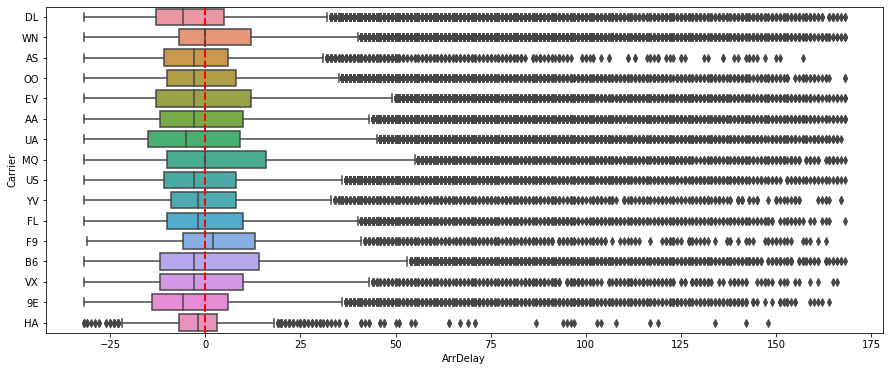

In [109]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_flights,x='ArrDelay', y='Carrier')
plt.axvline(x=0, color = 'red', linestyle='dashed', linewidth = 2)

## ArrDelays by days of the week

In [124]:
df_flights['DayOfWeek'] = pd.Categorical(df_flights['DayOfWeek'])
# df_flights.dtypes

Data shows that there is greater tendency of arrival delays on DayOfWeek 4 i.e. Thursday compared to other days.

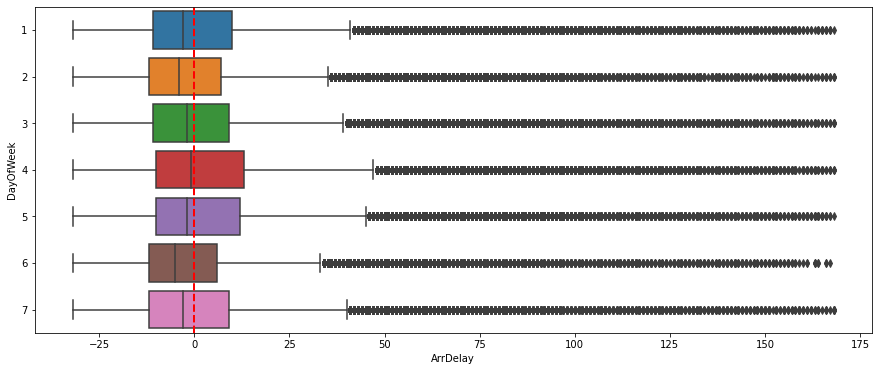

In [123]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_flights,x='ArrDelay', y='DayOfWeek')
plt.axvline(x=0, color = 'red', linestyle='dashed', linewidth = 2)

## Airports with highest average dep delay

 
 Most delays:
OriginAirportName
Chicago Midway International       13.785553
Chicago O'Hare International       12.682270
Denver International               11.710416
Dallas/Fort Worth International    11.634602
William P Hobby                    11.403315
Name: DepDelay, dtype: float64

 Least delays:
OriginAirportName
Honolulu International                 3.390653
Tucson International                   3.021113
Long Beach Airport                     1.957553
Ted Stevens Anchorage International    1.720930
Kahului Airport                        1.498162
Name: DepDelay, dtype: float64




<AxesSubplot:xlabel='OriginAirportName'>

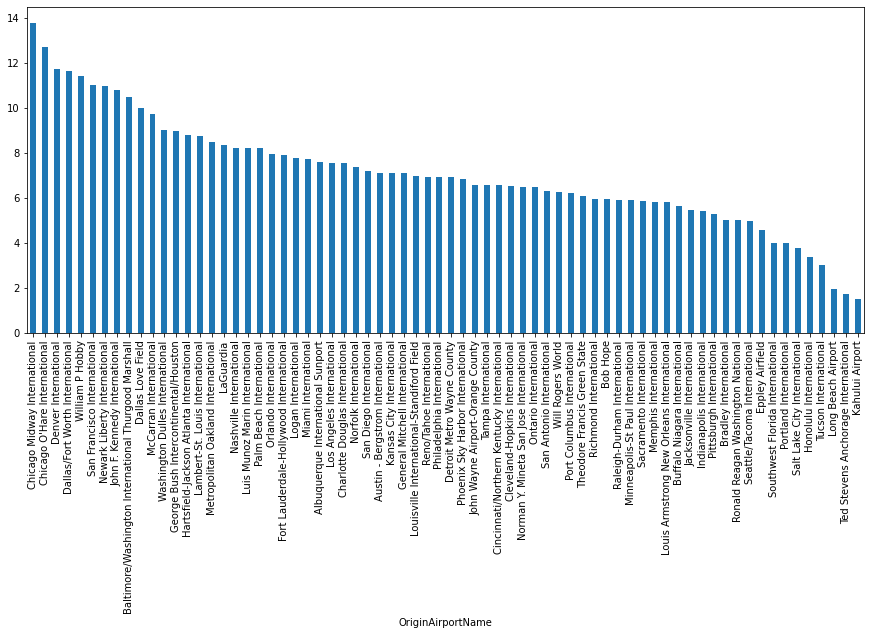

In [137]:
airport_dep_delays = df_flights.groupby('OriginAirportName')['DepDelay'].mean()
airport_dep_delays = airport_dep_delays.sort_values(ascending=False)
print(' \n Most delays:')
print(airport_dep_delays.head())
print('\n Least delays:')
print(airport_dep_delays.tail())
print('\n')
airport_dep_delays.plot(kind='bar', figsize=(15,6))


## Dep Delay vs Arr Delay
Data shows strong correlation between dep delay and arr delay. So flights with higher dep delay tend to have high arr delay.


          DepDelay  ArrDelay
DepDelay  1.000000  0.891969
ArrDelay  0.891969  1.000000


<AxesSubplot:xlabel='DepDelay', ylabel='ArrDelay'>

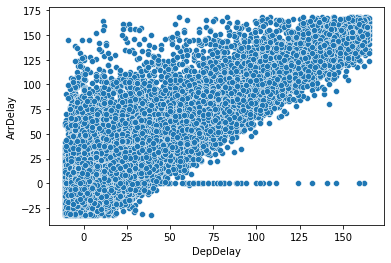

In [141]:
print(df_flights[['DepDelay','ArrDelay']].corr())
sns.scatterplot(data=df_flights,x='DepDelay',y='ArrDelay')

## Route analysis
Which route (from origin airport to destination airport) has the most late arrivals?
Which route has the highest average arrival delay?

In [144]:
df_flights['Route'] = df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName']
# df_flights.head()

In [147]:
print('\n Most late arrivals')
print( df_flights.groupby('Route')['ArrDelay'].sum().sort_values(ascending=False).head())
print('\n')
print(' \n Highest average arrival delay')
print( df_flights.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False).head())



 Most late arrivals
Route
Los Angeles International > San Francisco International                    12932
San Francisco International > Los Angeles International                     8947
McCarran International > San Francisco International                        8551
LaGuardia > Hartsfield-Jackson Atlanta International                        6242
Chicago O'Hare International > Hartsfield-Jackson Atlanta International     5953
Name: ArrDelay, dtype: int64


 
 Highest average arrival delay
Route
Pittsburgh International > Raleigh-Durham International           63.000000
Metropolitan Oakland International > Logan International          54.111111
Newark Liberty International > Will Rogers World                  46.466667
Southwest Florida International > Theodore Francis Green State    44.000000
Cleveland-Hopkins International > Philadelphia International      43.727273
Name: ArrDelay, dtype: float64


In [161]:
sum_arr_data = pd.pivot_table(data = df_flights, index = 'OriginAirportName', columns='DestAirportName', values='ArrDelay',aggfunc='sum')
mean_arr_data = pd.pivot_table(data = df_flights, index = 'OriginAirportName', columns='DestAirportName', values='ArrDelay',aggfunc='mean')

<AxesSubplot:xlabel='DestAirportName', ylabel='OriginAirportName'>

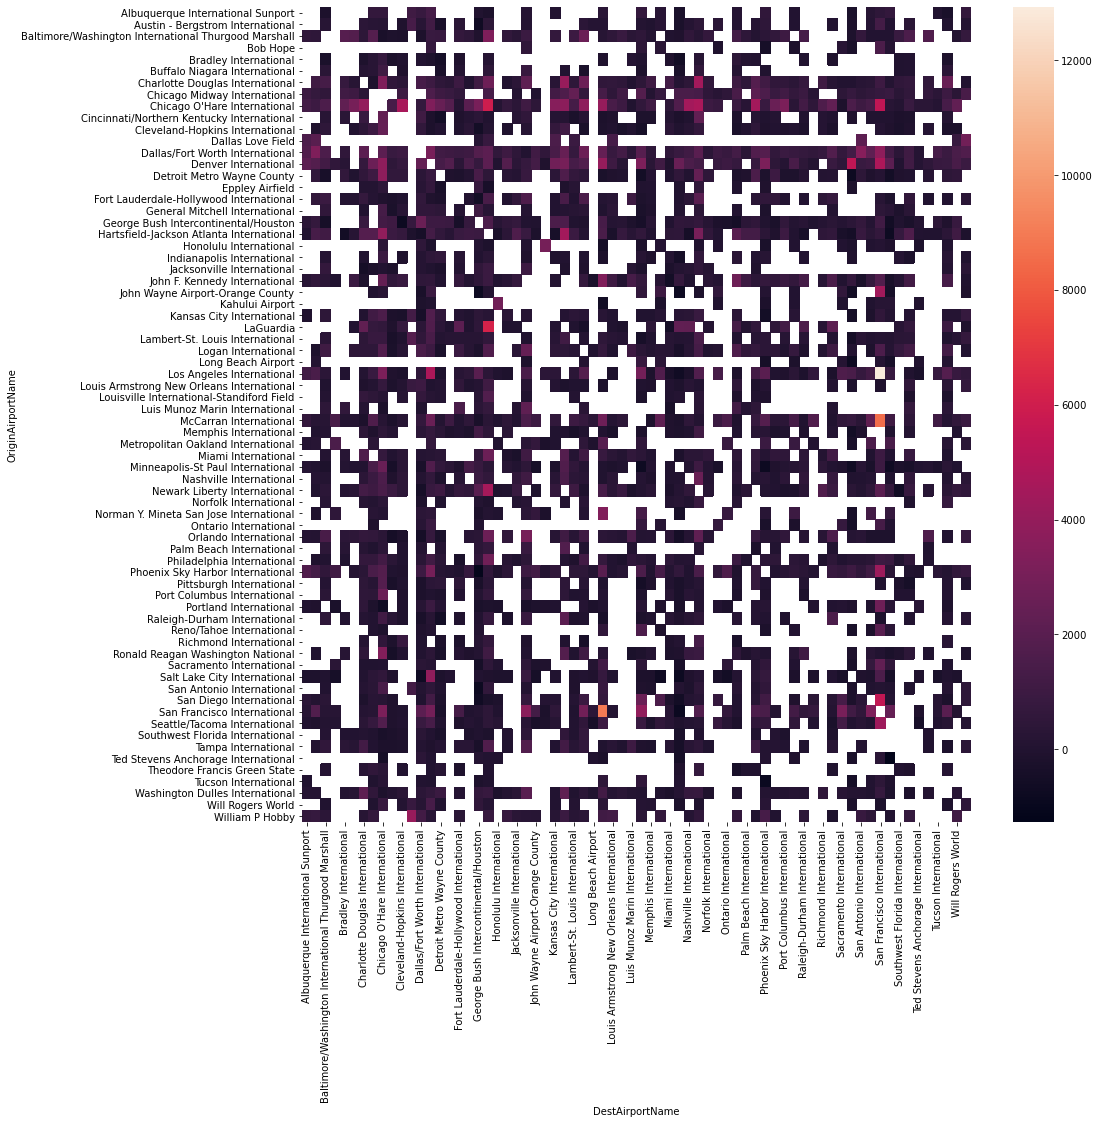

In [167]:
plt.figure(figsize=(15,15))
sns.heatmap(sum_arr_data)

<AxesSubplot:xlabel='DestAirportName', ylabel='OriginAirportName'>

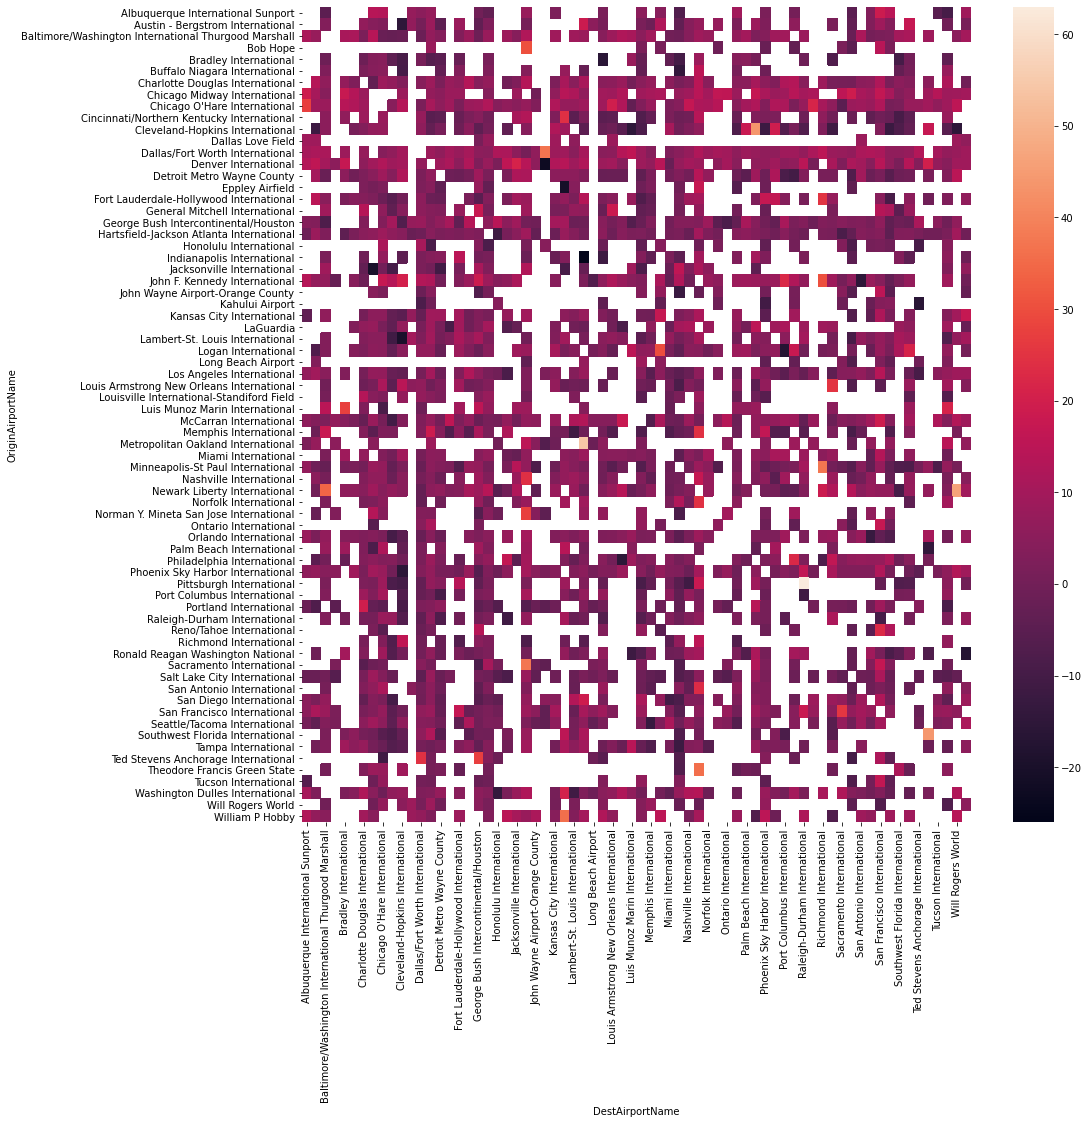

In [168]:
plt.figure(figsize=(15,15))
sns.heatmap(mean_arr_data)